Combinación de PCA y regresión logística --- 9:21 min
===

* 9:21 min | Última modificación: Octubre 1, 2021 | [YouTube](https://youtu.be/CqRjAkQ5RbU)

https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py

Pipeline
---

In [1]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pca = PCA()
logisticRegression = LogisticRegression(max_iter=10000, tol=0.1)

pipeline = Pipeline(
    steps=[
        ("pca", pca),
        ("logistic", logisticRegression),
    ]
)

Preparación de datos
---

In [2]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

Búsqueda de hiperparámetros óptimos
---

In [3]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {
    "pca__n_components": [5, 15, 30, 45, 64],
    "logistic__C": np.logspace(-4, 4, 4),
}

gridSearchCV = GridSearchCV(pipeline, param_grid)

gridSearchCV.fit(X_digits, y_digits)

gridSearchCV.best_score_

0.9198885793871865

In [4]:
gridSearchCV.best_params_

{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}

Variación de la precisión del modelo respecto a la cantidad de componentes
---

In [5]:
import pandas as pd

selected_columns = [
    "param_pca__n_components",
    "mean_test_score",
    "std_test_score",
]


results = pd.DataFrame(gridSearchCV.cv_results_)
results = results[selected_columns]
results.head(10)

param_pca__n_components  mean_test_score  std_test_score
0                       5         0.778530        0.023237
1                      15         0.888158        0.031916
2                      30         0.899841        0.029181
3                      45         0.899842        0.027867
4                      64         0.900398        0.027446
5                       5         0.824184        0.040388
6                      15         0.905413        0.029889
7                      30         0.918219        0.029255
8                      45         0.919889        0.028544
9                      64         0.919889        0.027828

In [6]:
components_col = "param_pca__n_components"

best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs

param_pca__n_components  mean_test_score  \
param_pca__n_components                                              
5                       5                       5         0.824184   
15                      6                      15         0.905413   
30                      7                      30         0.918219   
45                      8                      45         0.919889   
64                      9                      64         0.919889   

                           std_test_score  
param_pca__n_components                    
5                       5        0.040388  
15                      6        0.029889  
30                      7        0.029255  
45                      8        0.028544  
64                      9        0.027828

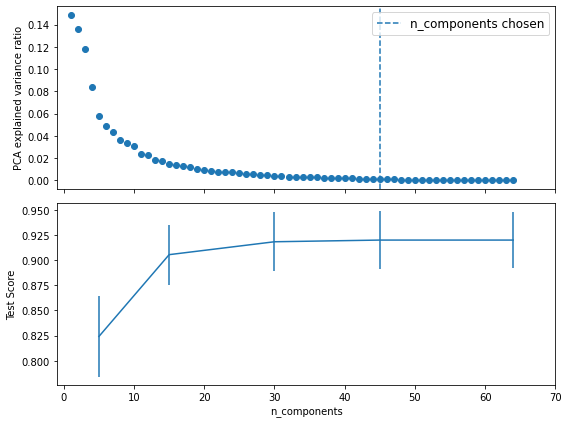

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#
# Grafica el radio de varianza explicado vs la cantidad de
# componentes
#
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(8, 6),
)

ax0.plot(
    np.arange(1, pca.n_components_ + 1),
    pca.explained_variance_ratio_,
    "o",
    c="tab:blue",
    linewidth=2,
)

ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    gridSearchCV.best_estimator_.named_steps["pca"].n_components,
    linestyle="--",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

#
# Grafica del valor esperado del Test Score
#
best_clfs.plot(
    x=components_col,
    y="mean_test_score",
    yerr="std_test_score",
    legend=False,
    ax=ax1,
)
ax1.set_ylabel("Test Score")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()